## Задание

Используя шаблон ноутбука, напишите четыре нейронки для распознавания писателей. Для этого выполните следующее:
- Загрузите данные и разделите на слова.
- Создайте словарь и превратите данные в индексы.
- Превратите данные в обучающую выборку.
- Напишите нейронные сети.

Четыре нейронки, которые нужно написать:
- Embedding + Dense сеть.
- Embedding + LSTM сеть.
- Embedding + Conv1D сеть.
- Embedding + сложная сеть из Dense, LSTM и Conv1D.

Для выполнения задания можно смотреть в ноутбук задания, но код желательно писать своими руками, а не копировать.


In [2]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.python.keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q '/content/drive/My Drive/Тексты писателей.zip' -d /content/texts

In [5]:
!ls

drive  sample_data  texts


In [6]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read().replace('\n', ' ')
  return text

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

trainText = []
testText = []


for i in className:
  for j in os.listdir('texts/'):
    if i in j:
      if 'Обучающая' in j: 
        trainText.append(readText('texts/' + j))
      if 'Тестовая' in j:
        testText.append(readText('texts/' + j))
print(len(trainText))

tokenizer = Tokenizer(num_words=20000, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)

6


In [0]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
  return xSample

def createSetsMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) 
  xSamples = []
  ySamples = []
  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))
  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)
  return (xSamples, ySamples)

In [0]:
xLen = 1000
step = 100

In [0]:
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)

Epoch 1/40
35/35 [==============================] - 1s 35ms/step - loss: 1.2642 - accuracy: 0.5222 - val_loss: 1.7734 - val_accuracy: 0.3356
Epoch 2/40
35/35 [==============================] - 1s 33ms/step - loss: 0.0359 - accuracy: 0.9986 - val_loss: 1.7892 - val_accuracy: 0.3649
Epoch 3/40
35/35 [==============================] - 1s 33ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.7461 - val_accuracy: 0.3832
Epoch 4/40
35/35 [==============================] - 1s 33ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7038 - val_accuracy: 0.3869
Epoch 5/40
35/35 [==============================] - 1s 33ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.6563 - val_accuracy: 0.3926
Epoch 6/40
35/35 [==============================] - 1s 32ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.6014 - val_accuracy: 0.4046
Epoch 7/40
35/35 [==============================] - 1s 33ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5379 - val_accuracy: 0.4276
Epoch 8/40
35

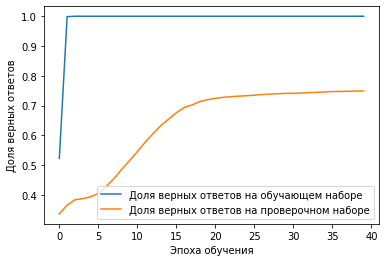

In [19]:
model = Sequential()
model.add(Embedding(20000, 12, input_length=xLen))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=512,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/20
35/35 [==============================] - 3s 72ms/step - loss: 1.7338 - accuracy: 0.2597 - val_loss: 1.7695 - val_accuracy: 0.2929
Epoch 2/20
35/35 [==============================] - 2s 62ms/step - loss: 1.4406 - accuracy: 0.4992 - val_loss: 1.7432 - val_accuracy: 0.2929
Epoch 3/20
35/35 [==============================] - 2s 62ms/step - loss: 1.0854 - accuracy: 0.6229 - val_loss: 1.7170 - val_accuracy: 0.2964
Epoch 4/20
35/35 [==============================] - 2s 62ms/step - loss: 0.8288 - accuracy: 0.7558 - val_loss: 1.6604 - val_accuracy: 0.3560
Epoch 5/20
35/35 [==============================] - 2s 62ms/step - loss: 0.6539 - accuracy: 0.8457 - val_loss: 1.5651 - val_accuracy: 0.3769
Epoch 6/20
35/35 [==============================] - 2s 61ms/step - loss: 0.5384 - accuracy: 0.8997 - val_loss: 1.4889 - val_accuracy: 0.4086
Epoch 7/20
35/35 [==============================] - 2s 62ms/step - loss: 0.4710 - accuracy: 0.9423 - val_loss: 1.4559 - val_accuracy: 0.4150
Epoch 8/20
35

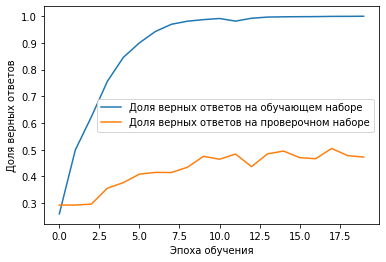

In [15]:
model = Sequential()
model.add(Embedding(20000, 12, input_length=xLen))
model.add(LSTM(4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/30
35/35 [==============================] - 2s 47ms/step - loss: 1.0887 - accuracy: 0.5750 - val_loss: 2.3243 - val_accuracy: 0.0739
Epoch 2/30
35/35 [==============================] - 1s 41ms/step - loss: 0.0201 - accuracy: 0.9988 - val_loss: 2.9416 - val_accuracy: 0.0739
Epoch 3/30
35/35 [==============================] - 1s 41ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.8489 - val_accuracy: 0.0739
Epoch 4/30
35/35 [==============================] - 1s 40ms/step - loss: 8.4201e-04 - accuracy: 1.0000 - val_loss: 2.7331 - val_accuracy: 0.0751
Epoch 5/30
35/35 [==============================] - 1s 41ms/step - loss: 6.0140e-04 - accuracy: 1.0000 - val_loss: 2.6183 - val_accuracy: 0.0918
Epoch 6/30
35/35 [==============================] - 1s 42ms/step - loss: 4.5864e-04 - accuracy: 1.0000 - val_loss: 2.4969 - val_accuracy: 0.1265
Epoch 7/30
35/35 [==============================] - 1s 41ms/step - loss: 3.6513e-04 - accuracy: 1.0000 - val_loss: 2.3717 - val_accuracy: 0.17

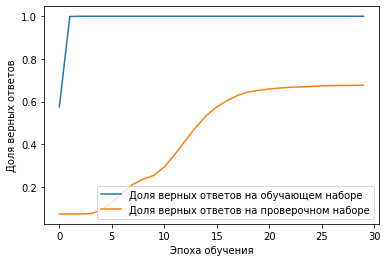

In [10]:
model = Sequential()
model.add(Embedding(20000, 12, input_length=xLen))
model.add(Conv1D(20, 5, activation="relu"))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=512,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/30
35/35 [==============================] - 3s 97ms/step - loss: 1.7613 - accuracy: 0.1967 - val_loss: 1.7800 - val_accuracy: 0.2912
Epoch 2/30
35/35 [==============================] - 3s 86ms/step - loss: 1.5602 - accuracy: 0.3300 - val_loss: 1.7738 - val_accuracy: 0.2559
Epoch 3/30
35/35 [==============================] - 3s 86ms/step - loss: 1.2643 - accuracy: 0.4511 - val_loss: 1.7328 - val_accuracy: 0.2098
Epoch 4/30
35/35 [==============================] - 3s 86ms/step - loss: 1.0296 - accuracy: 0.6390 - val_loss: 1.6722 - val_accuracy: 0.3525
Epoch 5/30
35/35 [==============================] - 3s 87ms/step - loss: 0.8191 - accuracy: 0.8130 - val_loss: 1.6173 - val_accuracy: 0.3703
Epoch 6/30
35/35 [==============================] - 3s 87ms/step - loss: 0.6422 - accuracy: 0.9015 - val_loss: 1.6052 - val_accuracy: 0.3561
Epoch 7/30
35/35 [==============================] - 3s 86ms/step - loss: 0.4923 - accuracy: 0.9509 - val_loss: 1.5621 - val_accuracy: 0.3757
Epoch 8/30
35

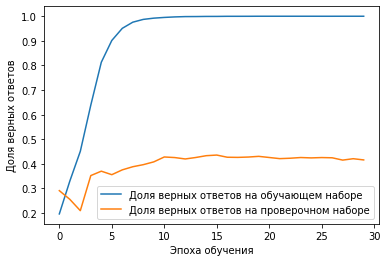

In [11]:
model = Sequential()
model.add(Embedding(20000, 12, input_length=xLen))
model.add(Conv1D(20, 5, activation="relu"))
model.add(LSTM(4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=512,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Лучший результат дал самый простой вариант нейросети.

75% не так уж и плохо =)